In [1]:
import numpy as np
import xlrd
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#importing from excel
workbook= xlrd.open_workbook("2016_gold_data_monthly_avg.xlsx")
sheet = workbook.sheet_by_index(0)

In [3]:
# x is input and y is output
x = [[sheet.cell_value(r, c) for c in range(sheet.ncols-1)] for r in range(1,sheet.nrows)]
y = [[sheet.cell_value(r, sheet.ncols-1) for c in range(1)] for r in range(1,sheet.nrows)]
x = np.array(x)
y = np.array(y)

In [4]:
#normalizing data
ymax=y.max(axis=0)
x_normed = x / x.max(axis=0)
y_normed = y / y.max(axis=0)
post=y.max(axis=0)
x=x_normed
y=y_normed

In [5]:
#finding correlation between input and output

In [6]:
df=pd.DataFrame(x)
df['output']=y

In [7]:
print(df)

          0         1         2         3         4    output
0  0.712503  0.770731  0.333333  0.803458  1.000000  0.220276
1  0.759810  0.814517  0.416667  0.824968  0.953802  0.245711
2  0.810493  0.860833  0.791667  0.852957  0.929320  0.267487
3  0.857671  0.902328  0.958333  0.880473  0.911378  0.362567
4  0.896156  0.933824  1.000000  0.905524  0.868366  0.418476
5  0.911071  0.940490  0.500000  0.933333  0.837428  0.522496
6  0.892511  0.913243  0.083333  0.933333  0.885889  0.584283
7  0.926285  0.939967  0.125000  0.952381  0.853945  0.736653
8  0.960550  0.967514  0.125000  0.976190  0.814790  0.941812
9  1.000000  1.000000  0.125000  1.000000  0.837260  1.000000


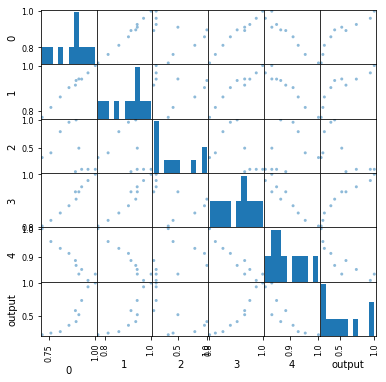

In [8]:
pd.plotting.scatter_matrix(df, figsize=(6, 6))
plt.show()

In [9]:
corr=df.corr()
corr['output'].values

array([ 0.90428045,  0.85877865, -0.62051143,  0.94818662, -0.84483724,
        1.        ])

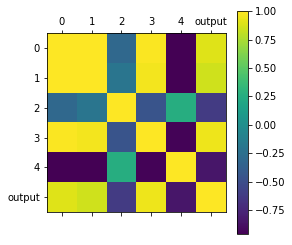

In [10]:
plt.matshow(df.corr())
plt.xticks(range(len(df.columns)), df.columns)
plt.yticks(range(len(df.columns)), df.columns)
plt.colorbar()
plt.show()

In [11]:
# All input parameters are correlated

In [12]:
# defining nonline function
def nonlin(x,deriv=False):
    if(deriv==True):
        return x*(1-x)
    return 1/(1+np.exp(-x))

In [13]:
#starting with random weights
np.random.seed(1)
w0 = 2*np.random.random((sheet.ncols-1,10)) - 1
w1 = 2*np.random.random((10,8)) - 1
w2 = 2*np.random.random((8,1)) - 1

Error at 0  :  27.291575014140307 %
Error at 1000  :  4.9044339219113215 %
Error at 2000  :  2.939401208444223 %
Error at 3000  :  2.03907369238595 %
Error at 4000  :  1.7404888560821756 %
Error at 5000  :  1.6359156943470878 %
Error at 6000  :  1.5540220595151302 %
Error at 7000  :  1.4845990667770976 %
Error at 8000  :  1.4434057086619678 %
Error at 9000  :  1.4057909605173449 %


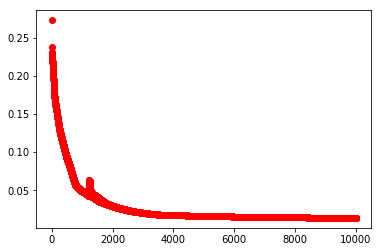

In [14]:
#ANN model upto 10000 echos :
for j in range(10000):
    # model
    l0 = x
    l1 = nonlin(np.dot(l0,w0))
    l2 = nonlin(np.dot(l1,w1))
    l3 = nonlin(np.dot(l2,w2))
    # error
    l3_error = y - l3
    if (j % 1000) == 0:
        print ("Error at "+ str(j) + "  :  " +str(np.mean(100*np.abs(l3_error)))+" %")
        
    l3_delta = l3_error*nonlin(l3,deriv=True)

    l2_error = l3_delta.dot(w2.T)
    l2_delta = l2_error * nonlin(l2,deriv=True)
    l1_error = l2_delta.dot(w1.T)
    l1_delta = l1_error * nonlin(l1,deriv=True)
    w2 += l2.T.dot(0.5*l3_delta)
    w1 += l1.T.dot(0.5*l2_delta)
    w0 += l0.T.dot(0.5*l1_delta)
    plt.plot(j,np.mean(np.abs(l3_error)),'ro')